# A brief tour of the IPython notebook

This document will give you a brief tour of the capabilities of the IPython notebook.  
You can view its contents by scrolling around, or execute each cell by typing `Shift-Enter`.
After you conclude this brief high-level tour, you should read the accompanying notebook 
titled `01_notebook_introduction`, which takes a more step-by-step approach to the features of the
system.  

The rest of the notebooks in this directory illustrate various other aspects and 
capabilities of the IPython notebook; some of them may require additional libraries to be executed.

**NOTE:** This notebook *must* be run from its own directory, so you must ``cd``
to this directory and then start the notebook, but do *not* use the ``--notebook-dir``
option to run it from another location.

The first thing you need to know is that you are still controlling the same old IPython you're used to,
so things like shell aliases and magic commands still work:

In [8]:
pwd

'C:\\repos\\python-bootcamp\\DataFiles_and_Notebooks\\04_IPythonNotebookIntroduction'

In [9]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 94B9-6F75

 Directory of C:\repos\python-bootcamp\DataFiles_and_Notebooks\04_IPythonNotebookIntroduction

09/16/2019  10:21 AM    <DIR>          .
09/16/2019  10:21 AM    <DIR>          ..
09/16/2019  10:19 AM    <DIR>          .ipynb_checkpoints
09/16/2019  10:21 AM           113,731 00_notebook_tour.ipynb
09/14/2019  11:13 PM            46,419 01_notebook_introduction.ipynb
09/14/2019  11:13 PM            11,903 animation.m4v
09/14/2019  11:13 PM             3,861 breakout.ipynb
09/14/2019  11:13 PM            15,748 ipython-tutor.ipynb
               5 File(s)        191,662 bytes
               3 Dir(s)  123,686,162,432 bytes free


In [10]:
message = 'The IPython notebook is great!'
# note: the echo command does not run on Windows, it's a unix command.
!echo $message

The IPython notebook is great!


Plots with matplotlib. Let's initialize `pylab` mode with `inline` images

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


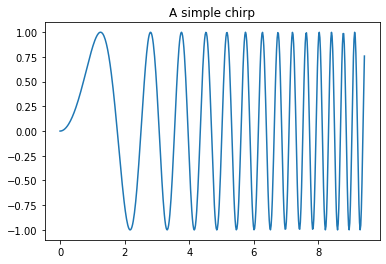

In [12]:
x = linspace(0, 3*pi, 500)
plot(x, sin(x**2))
title('A simple chirp');

You can paste blocks of input with prompt markers, such as those from
[the official Python tutorial](http://docs.python.org/tutorial/interpreter.html#interactive-mode)

In [13]:
>>> the_world_is_flat = 1
>>> if the_world_is_flat:
...     print "Be careful not to fall off!"

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Be careful not to fall off!")? (<ipython-input-13-4931a23eb855>, line 3)

Errors are shown in informative ways:

In [14]:
%run non_existent_file

ERROR:root:File `'non_existent_file.py'` not found.


In [15]:
x = 1
y = 4
z = y/(1-x)

ZeroDivisionError: division by zero

When IPython needs to display additional information (such as providing details on an object via `x?`
it will automatically invoke a pager at the bottom of the screen:

In [16]:
magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

## Non-blocking output of kernel

If you execute the next cell, you will see the output arriving as it is generated, not all at the end.

In [17]:
import time, sys
for i in range(8):
    print i,
    time.sleep(0.5)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(i, end=" ")? (<ipython-input-17-0f9bf8389dd2>, line 3)

## Clean crash and restart

We call the low-level system libc.time routine with the wrong argument via
ctypes to segfault the Python interpreter:

In [18]:
from ctypes import CDLL
# This will crash a linux system; equivalent calls can be made on Windows or Mac
libc = CDLL("libc.so.6") 
libc.time(-1)  # BOOM!!

OSError: [WinError 126] The specified module could not be found

## Markdown cells can contain formatted text and code

You can *italicize*, **boldface**

* build
* lists

and embed code meant for illustration instead of execution in Python:

    def f(x):
        """a docstring"""
        return x**2

or other languages:

    if (i=0; i<n; i++) {
      printf("hello %d\n", i);
      x += 4;
    }

Courtesy of MathJax, you can include mathematical expressions both inline: 
$e^{i\pi} + 1 = 0$  and displayed:

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

## Rich displays: include anyting a browser can show

Note that we have an actual protocol for this, see the `display_protocol` notebook for further details.

### Images

In [19]:
from IPython.core.display import Image
Image(filename='../../source/_static/logo.png')

FileNotFoundError: [Errno 2] No such file or directory: '../../source/_static/logo.png'

An image can also be displayed from raw data or a url

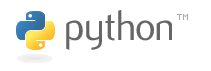

In [20]:
Image('http://python.org/images/python-logo.gif')

SVG images are also supported out of the box (since modern browsers do a good job of rendering them):

In [21]:
from IPython.core.display import SVG
SVG(filename='python-logo.svg')

FileNotFoundError: [Errno 2] No such file or directory: 'python-logo.svg'

### Video

And more exotic objects can also be displayed, as long as their representation supports 
the IPython display protocol.

For example, videos hosted externally on YouTube are easy to load (and writing a similar wrapper for other
hosted content is trivial):

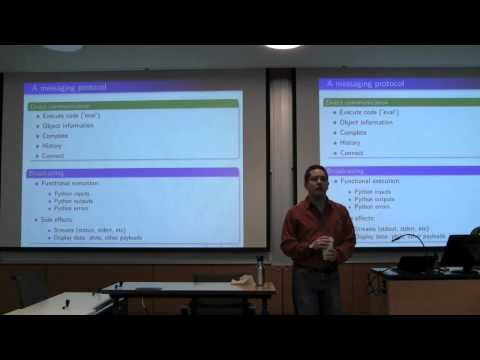

In [22]:
from IPython.lib.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('1j_HxD4iLn8')

Using the nascent video capabilities of modern browsers, you may also be able to display local
videos.  At the moment this doesn't work very well in all browsers, so it may or may not work for you;
we will continue testing this and looking for ways to make it more robust.  

The following cell loads a local file called  `animation.m4v`, encodes the raw video as base64 for http
transport, and uses the HTML5 video tag to load it. On Chrome 15 it works correctly, displaying a control
bar at the bottom with a play/pause button and a location slider.

In [23]:
from IPython.core.display import HTML
video = open("animation.m4v", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

AttributeError: 'bytes' object has no attribute 'encode'

### External sites

You can even embed an entire page from another site in an iframe; for example this is today's Wikipedia
page for mobile users:

In [24]:
HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350>')

### Mathematics

And we also support the display of mathematical expressions typeset in LaTeX, which is rendered
in the browser thanks to the [MathJax library](http://mathjax.org).  

Note that this is *different* from the above examples.  Above we were typing mathematical expressions
in Markdown cells (along with normal text) and letting the browser render them; now we are displaying
the output of a Python computation as a LaTeX expression wrapped by the `Math()` object so the browser
renders it:

In [25]:
from IPython.core.display import Math
Math(r'$F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx$')

<IPython.core.display.Math object>

# Loading external codes
* Drag and drop a ``.py`` in the dashboard
* Use ``%loadpy`` with any local or remote url: [the Matplotlib Gallery!](http://matplotlib.sourceforge.net/gallery.html)

In this notebook we've kept the output saved so you can see the result, but you should run the next
cell yourself (with an active internet connection).

In [26]:
%loadpy http://matplotlib.sourceforge.net/mpl_examples/pylab_examples/integral_demo.py

HTTPError: HTTP Error 404: Not Found

In [ ]:
#!/usr/bin/env python

# implement the example graphs/integral from pyx
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + zip(ix,iy) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()